<a href="https://colab.research.google.com/github/chenchenga07/MMM-Marketing-Mix-Modeling-/blob/main/MMM(Marketing_Mix_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data & Explore

In [12]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [61]:
# data source: https://www.kaggle.com/datasets/sazid28/advertising.csv/data
AdSpend = pd.read_csv('drive/MyDrive/Colab Notebooks/MMM/Advertising.csv')

In [62]:
AdSpend

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [63]:
AdSpend = AdSpend.rename(columns={'Unnamed: 0': 'week'})
AdSpend.describe()

,week,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [56]:
fig = px.line(AdSpend, x='week', y=['TV', 'radio', 'newspaper', 'sales'])
fig.show()

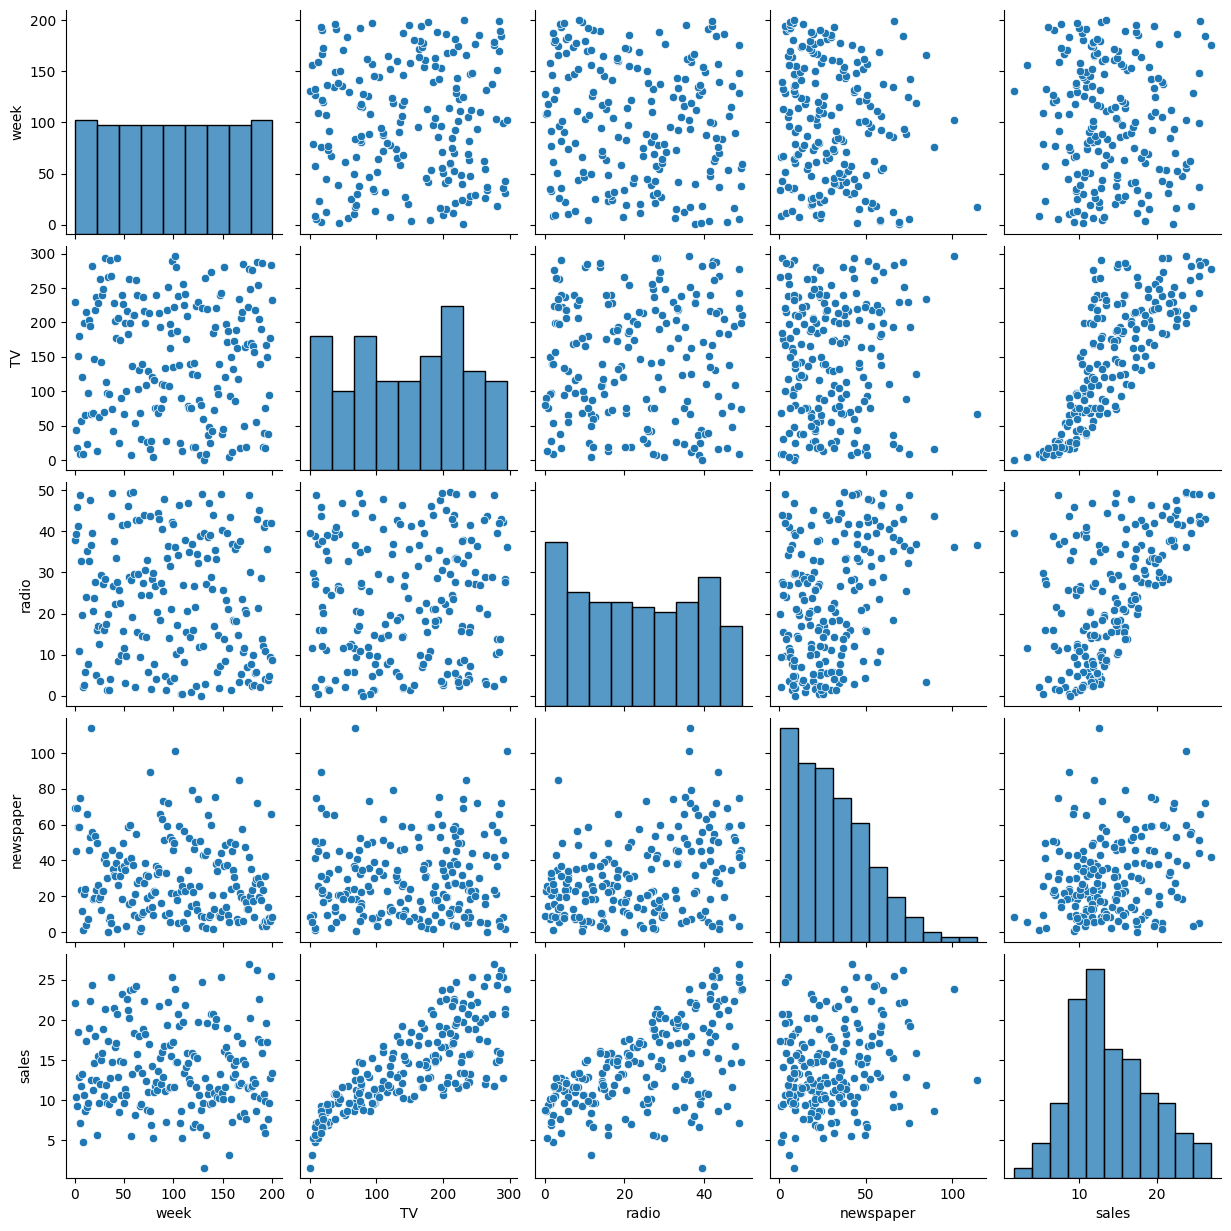

In [5]:
sns.pairplot(AdSpend)

## Check whether the data's distribution meet 4 linear regression assumptions

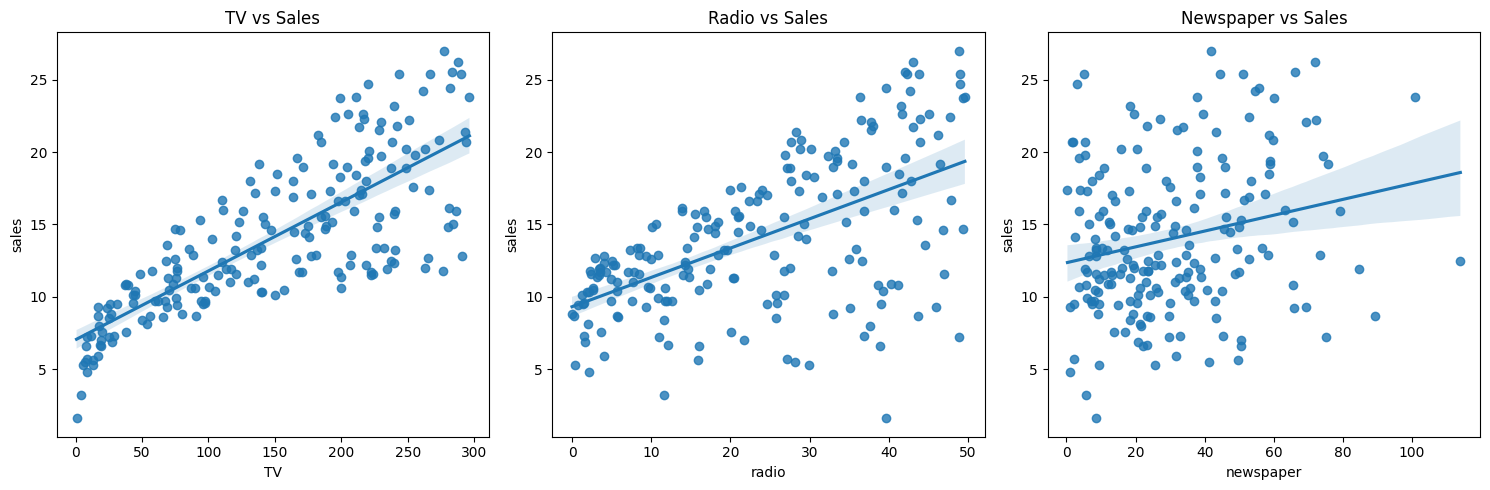

In [6]:
# 1. Linearity - yes

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='TV', y='sales', data=AdSpend, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.regplot(x='radio', y='sales', data=AdSpend, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.regplot(x='newspaper', y='sales', data=AdSpend, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

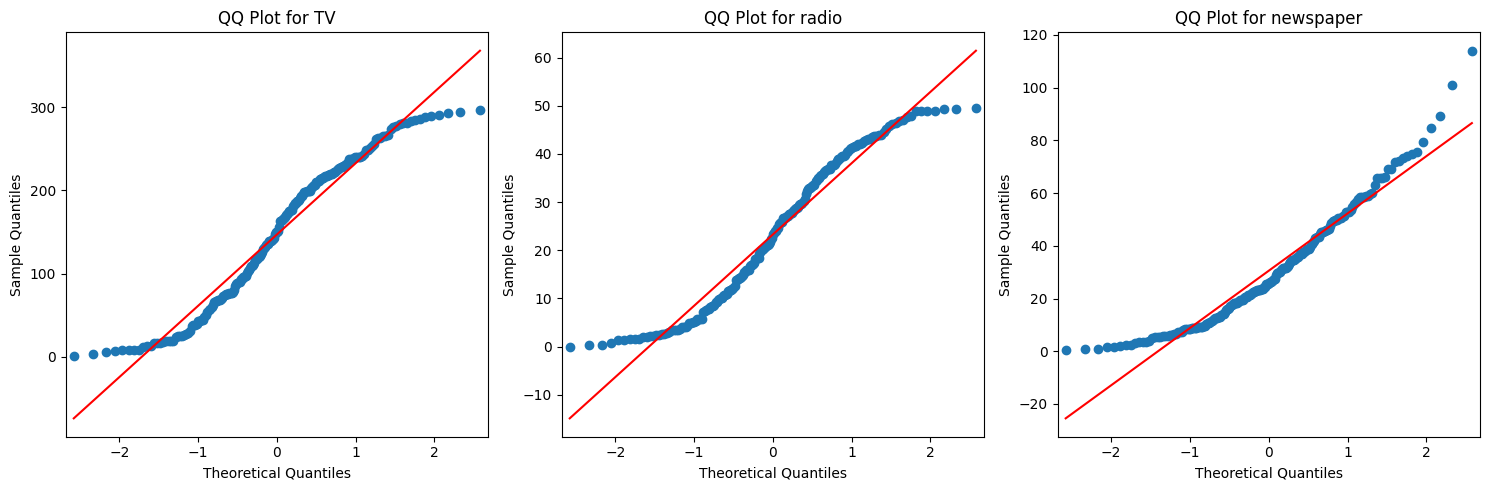

In [7]:
# 2. Normality of Residuals, QQ plot - not perfect straight lines

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(['TV', 'radio', 'newspaper']):
  sm.qqplot(AdSpend[column], line='s', ax=axes[i])
  axes[i].set_title(f'QQ Plot for {column}')

plt.tight_layout()
plt.show()

In [65]:
# boxcox process need > 0 data
AdSpend_sub = AdSpend[(AdSpend['TV'] > 0) & (AdSpend['radio'] > 0) & (AdSpend['newspaper'] > 0)]
len(AdSpend_sub)

199

In [66]:
# use boxcox to normalize data
for col in ['TV', 'radio', 'newspaper']:
  AdSpend_sub[f'{col}_new'], _ = stats.boxcox(AdSpend_sub[col])
AdSpend_sub

<ipython-input-66-bd032c63762f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-bd032c63762f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-bd032c63762f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,week,TV,radio,newspaper,sales,TV_new,radio_new,newspaper_new
0,1,230.1,37.8,69.2,22.1,71.494940,13.653121,11.874853
1,2,44.5,39.3,45.1,10.4,20.557522,14.024827,9.510140
2,3,17.2,45.9,69.3,9.3,9.576583,15.599871,11.883578
3,4,151.5,41.3,58.5,18.5,52.315519,14.512110,10.895521
4,5,180.8,10.8,58.4,12.9,59.721364,5.423186,10.885902
...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,18.242645,2.013955,4.822055
196,197,94.2,4.9,8.1,9.7,36.564023,2.702492,3.369167
197,198,177.0,9.3,6.4,12.8,58.780211,4.801675,2.824402
198,199,283.6,42.0,66.2,25.5,83.524048,14.680517,11.609635


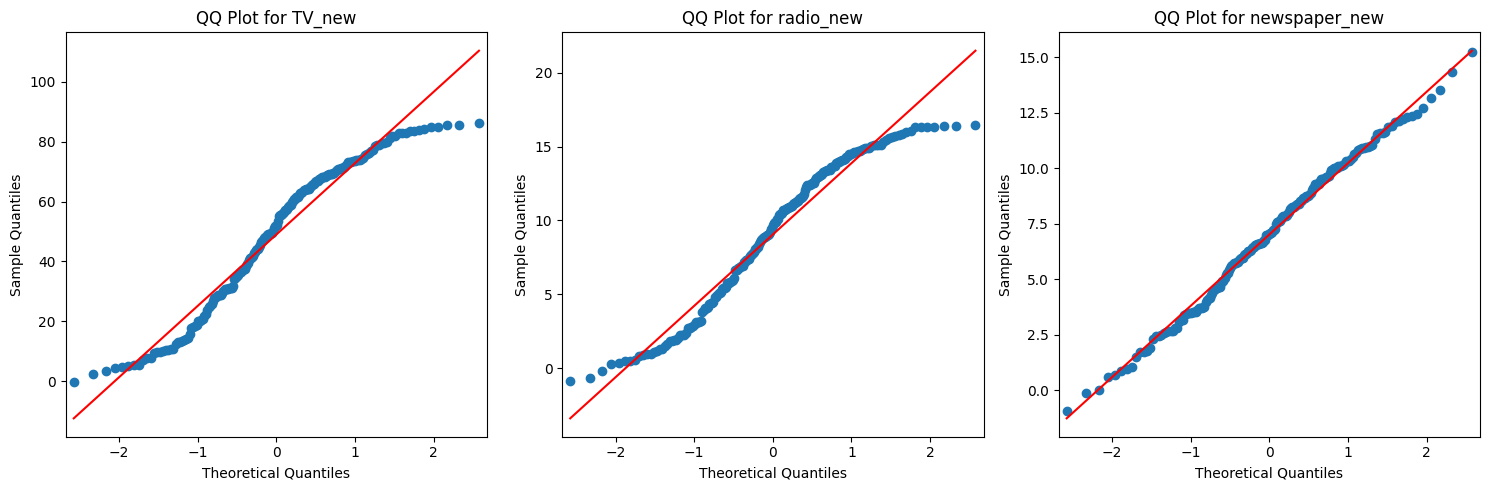

In [14]:
# after boxcox's QQ plot
# newspaper改善明显，其他两个不明显

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(['TV_new', 'radio_new', 'newspaper_new']):
  sm.qqplot(AdSpend_sub[column], line='s', ax=axes[i])
  axes[i].set_title(f'QQ Plot for {column}')

plt.tight_layout()
plt.show()

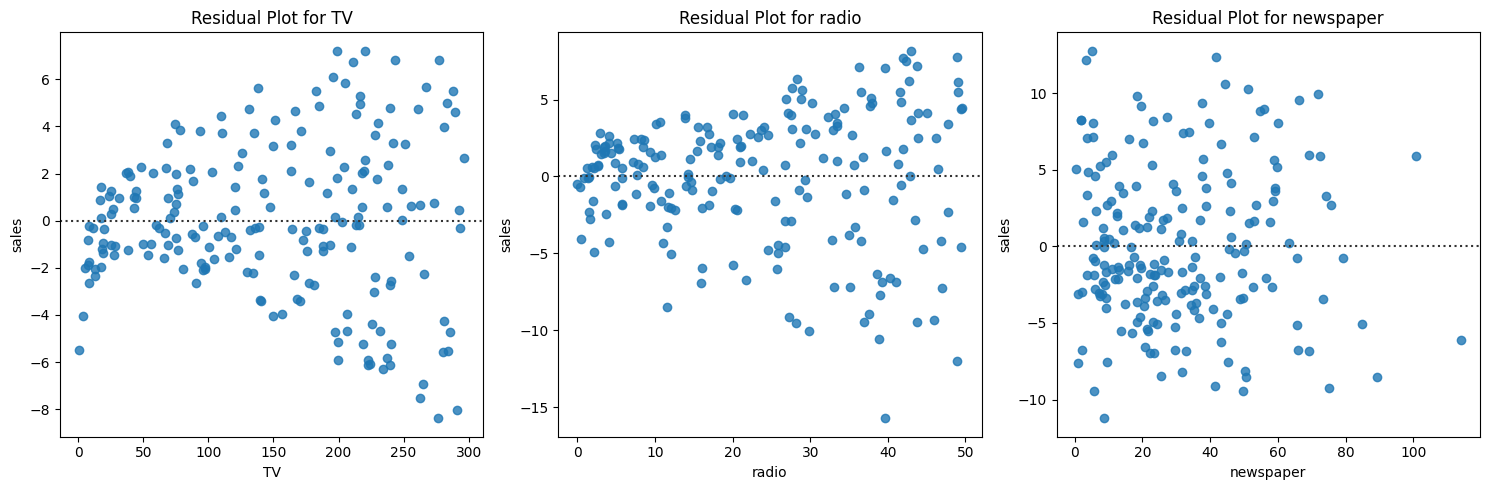

In [17]:
# 3. Homoscedasticity, residual plot - 分布不均匀，不是很符合3

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(['TV', 'radio', 'newspaper']):
  sns.residplot(x=AdSpend[column], y='sales', data=AdSpend, ax=axes[i])
  axes[i].set_title(f'Residual Plot for {column}')

plt.tight_layout()
plt.show()


In [ ]:
# 4. Independence
# We can assume independence if the data is collected in a way that ensures no correlation between observations.

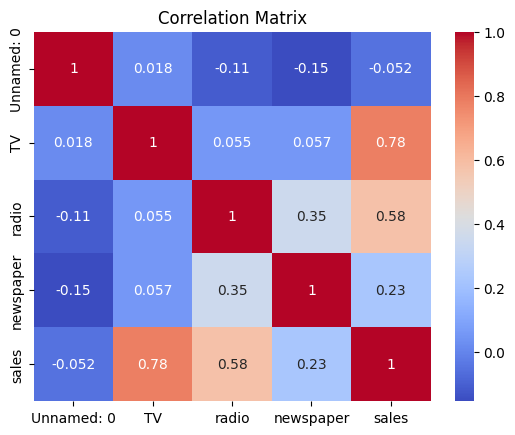

In [24]:
# plot a heatmap of the correlations between variables - ok

correlation_matrix = AdSpend.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Modeling

In [68]:
# LinearRegression
# 基于上述判断，给自变量做了一些变换，TV**0.5，newspaper normalizaed
# 好解释，有系数出来

X = AdSpend_sub[['TV', 'radio', 'newspaper_new']]
X['TV'] = X['TV']**0.5
y = AdSpend_sub['sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate R-squared for the training data
train_r_squared = r2_score(y_train, y_train_pred)
print(f"Training R-squared: {train_r_squared}")

# Make predictions on the testing data
y_test_pred = model.predict(X_test)

# Calculate R-squared for the testing data
test_r_squared = r2_score(y_test, y_test_pred)
print(f"Testing R-squared: {test_r_squared}")
print(model_sm.summary())

Training R-squared: 0.9304320297292084
Testing R-squared: 0.9215084659926481
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     852.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          8.98e-112
Time:                        04:41:58   Log-Likelihood:                -347.25
No. Observations:                 199   AIC:                             702.5
Df Residuals:                     195   BIC:                             715.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

<ipython-input-68-6dbeb7bebb37>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
# use random forest to do the same thing
# 比linear regression模型准确度好很多

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 使用 Random Forest 模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 在训练集上进行预测
y_train_pred_rf = rf_model.predict(X_train)

# 计算训练集上的 R-squared
train_r_squared_rf = r2_score(y_train, y_train_pred_rf)
print(f"Random Forest Training R-squared: {train_r_squared_rf}")

# 在测试集上进行预测
y_test_pred_rf = rf_model.predict(X_test)

# 计算测试集上的 R-squared
test_r_squared_rf = r2_score(y_test, y_test_pred_rf)
print(f"Random Forest Testing R-squared: {test_r_squared_rf}")

# 可以进一步分析特征重要性等
feature_importances = rf_model.feature_importances_
print(f"Feature importances: {feature_importances}")


Random Forest Training R-squared: 0.9968365050334695
Random Forest Testing R-squared: 0.9825530977974866
Feature importances: [0.65399747 0.33769413 0.0083084 ]


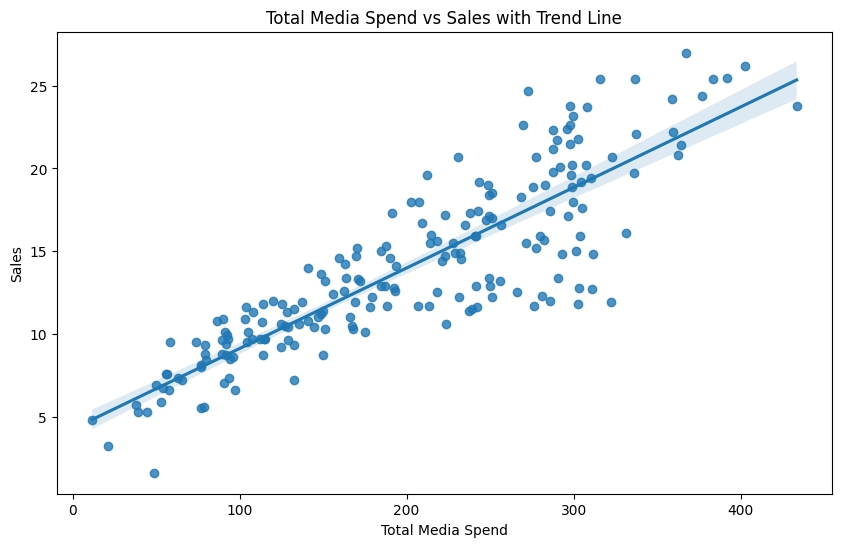

In [73]:
# plot a trend line, x is all media spend, y is total sales
# media curve, marginal return descreases not obvious

# Calculate total media spend
AdSpend['Total_Media_Spend'] = AdSpend['TV'] + AdSpend['radio'] + AdSpend['newspaper']

# Create the scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Media_Spend', y='sales', data=AdSpend)
plt.title('Total Media Spend vs Sales with Trend Line')
plt.xlabel('Total Media Spend')
plt.ylabel('Sales')
plt.show()